# 13132911 - Lab 3 - Data Preparation

## Import & Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bankLab3.csv")

## Missing Values

In [2]:
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [3]:
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [4]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,2000.000000,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

id              0
age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

### contact

In [6]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [7]:
df['contact'].fillna('cellular', inplace=True)

### poutcome

In [8]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [9]:
dfNullPout = df[df.poutcome.isnull()]
dfNullPout.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
799,799,33.0,blue-collar,married,primary,yes,-744,yes,no,cellular,8,may,206,1,-1,0,NaN,no
800,800,60.0,retired,married,primary,no,-2,yes,no,cellular,8,may,75,1,-1,0,NaN,no
801,801,33.0,technician,single,tertiary,no,129,yes,no,cellular,8,may,128,1,-1,0,NaN,no
802,802,33.0,services,divorced,secondary,no,411,yes,no,cellular,8,may,216,1,-1,0,NaN,no
803,803,47.0,management,married,tertiary,no,643,yes,no,cellular,8,may,155,1,-1,0,NaN,no
804,804,37.0,technician,single,NaN,no,391,yes,no,cellular,8,may,103,3,-1,0,NaN,no
805,805,34.0,blue-collar,married,secondary,no,80,yes,yes,cellular,8,may,494,1,-1,0,NaN,no
806,806,32.0,technician,single,secondary,no,10,yes,no,cellular,8,may,107,1,-1,0,NaN,no
807,807,36.0,admin.,married,secondary,no,114,yes,yes,cellular,8,may,147,1,-1,0,NaN,no
808,808,40.0,blue-collar,single,secondary,no,1,yes,no,cellular,8,may,190,1,-1,0,NaN,no


In [10]:
dfNullPout['pdays'].value_counts()

-1    454
Name: pdays, dtype: int64

In [11]:
df['poutcome'].fillna('none', inplace = True)

### age

In [12]:
df[df.age.isnull()]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,456,NaN,self-employed,married,tertiary,no,917,no,no,cellular,6,feb,518,3,212,5,failure,no
472,472,NaN,blue-collar,married,primary,no,474,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,526,NaN,services,married,secondary,no,2478,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,595,NaN,management,married,tertiary,no,1857,no,no,cellular,29,jan,386,1,168,4,failure,no
597,597,NaN,self-employed,married,secondary,yes,254,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,601,NaN,admin.,single,secondary,no,111,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,605,NaN,management,married,tertiary,no,1330,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,744,NaN,management,married,tertiary,no,-61,no,no,cellular,30,jan,90,5,172,1,failure,no
795,795,NaN,technician,single,tertiary,no,992,yes,no,cellular,4,may,301,1,88,2,success,no
1171,1171,NaN,retired,married,tertiary,no,2812,no,no,cellular,3,aug,392,4,181,3,success,yes


In [13]:
ageTable = df.pivot_table(values='age', 
                       index='job', 
                       columns='education', 
                       aggfunc=np.median)
print(ageTable)

education      primary  secondary  tertiary
job                                        
admin.            48.5       40.0      33.0
blue-collar       42.5       37.0      29.0
entrepreneur      55.0       42.5      43.5
housemaid         50.5       48.5      32.0
management        53.0       39.0      37.0
retired           70.0       63.0      68.0
self-employed      NaN       43.0      35.0
services          47.0       36.0      32.0
student           22.0       25.0      27.0
technician        49.0       38.0      35.0
unemployed        39.0       40.0      35.0


In [14]:
# Get age from table by job and education
def get_age(x):
    return ageTable.loc[x['job'], x['education']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_age, axis=1), inplace=True)

# Check
df[df.age.isnull()]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


### job

In [15]:
df[df.job.isnull()]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,255,42.0,NaN,single,primary,no,2398,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,257,46.0,NaN,married,NaN,no,677,no,no,cellular,3,feb,425,1,82,1,failure,no
831,831,41.0,NaN,single,primary,no,2398,yes,no,cellular,8,may,287,2,-1,0,none,no
1223,1223,55.0,NaN,married,secondary,no,2206,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,1281,50.0,NaN,married,NaN,no,558,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,1669,54.0,NaN,married,secondary,no,2206,no,no,cellular,13,may,260,1,91,4,success,yes
1711,1711,77.0,NaN,married,NaN,no,397,no,no,telephone,7,may,300,3,-1,0,none,yes
1801,1801,28.0,NaN,single,NaN,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,1868,48.0,NaN,single,NaN,no,1819,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,1975,45.0,NaN,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,none,yes


In [16]:
binsAge = [18, 24, 30, 40, 50, 60, 70, 80]
binsBal = [0, 500, 1000, 1500, 2000, 2500]
jobsTable = df.groupby([pd.cut(df.balance, binsBal), pd.cut(df.age, binsAge)])['job'].agg(pd.Series.mode).to_frame()
jobsTable

job
balance      age                                            
(0, 500]     (18, 24]                                student
             (24, 30]                             management
             (30, 40]                             management
             (40, 50]                             management
             (50, 60]                             technician
             (60, 70]                                retired
             (70, 80]                                retired
(500, 1000]  (18, 24]                                student
             (24, 30]                             management
             (30, 40]                             management
             (40, 50]  [blue-collar, management, technician]
             (50, 60]                             technician
             (60, 70]                                retired
             (70, 80]                                retired
(1000, 1500] (18, 24]                                student
             (24, 30]                             management
             (30, 40]                             management
             (40, 50]      [admin., blue-collar, management]
             (50, 60]                             technician
             (60, 70]                                retired
             (70, 80]                                retired
(1500, 2000] (18, 24]                                student
             (24, 30]                                student
             (30, 40]                             management
             (40, 50]                            blue-collar
             (50, 60]                             management
             (60, 70]                                retired
             (70, 80]                                retired
(2000, 2500] (18, 24]                                student
             (24, 30]                             technician
             (30, 40]                             management
             (40, 50]                             management
             (50, 60]                             management
             (60, 70]                                retired
             (70, 80]                      [admin., retired]

In [17]:
df['job'] = np.where(((df.job.isnull()) & (df.age<60)), 'management',
             np.where(((df.job.isnull()) & (df.age>=60)), 'retired', df['job']))

### education

In [18]:
df[df.education.isnull()].head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
10,10,38.0,management,single,NaN,no,715,yes,no,cellular,2,apr,951,1,132,3,failure,no
15,15,38.0,blue-collar,married,NaN,no,0,yes,no,cellular,2,apr,477,2,267,1,failure,no
124,124,39.0,blue-collar,married,NaN,no,0,no,no,cellular,2,feb,731,1,193,3,failure,no
209,209,37.0,management,married,NaN,no,247,no,no,cellular,2,feb,192,2,208,1,failure,no
257,257,46.0,management,married,NaN,no,677,no,no,cellular,3,feb,425,1,82,1,failure,no


In [19]:
eduTable = df.groupby([df.job])['education'].agg(pd.Series.mode).to_frame().reset_index()
print(eduTable)

              job  education
0          admin.  secondary
1     blue-collar  secondary
2    entrepreneur   tertiary
3       housemaid    primary
4      management   tertiary
5         retired  secondary
6   self-employed   tertiary
7        services  secondary
8         student  secondary
9      technician  secondary
10     unemployed  secondary


In [20]:
# Get age from table by job and education
def get_edu(x):
    return eduTable.loc[eduTable['job'] == x['job'], 'education'].iloc[0]

# Replace missing values
df['education'].fillna(df[df['education'].isnull()].apply(get_edu, axis=1), inplace=True)

# Check
df[df.education.isnull()]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


### Reasoning

1. Contact: didn't seem very important, since the choices were only cellular or telephone, and the vast majority went with cellular, so I simply filled in the NULL values as cellular too.
2. poutcome: being NULL implied this was the first call and there was no previous one, and inspecting the 'pdays' column, all values were -1. I set these NULLs to a new value - 'none'.
3. Age: I took the average age for each combination of education and job, then assigned that to the appropriate people.
4. Job: I tried to do this with bins, grouping by balance and age, but ultimately it kept recommending me 'management' for almost all the combinations which had missing jobs. I also couldn't find out how to query a "binned" table like that. I decided management was a reasonable assumption for the middle-aged individuals, and retired for the one older individual.
5. Education: Cross-referencing with jobs seemed like a solid estimate here, so I went with that.

## Outliers

In [21]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.737750,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.709981,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


balance, duration, pdays, previous?

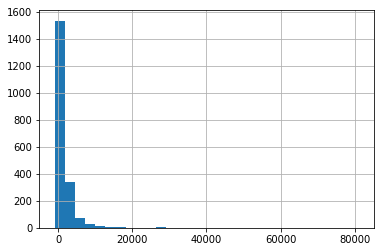

In [22]:
df['balance'].hist(bins=30)

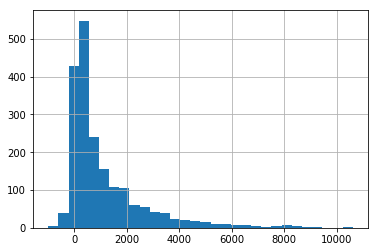

In [23]:
# Can't use log since there are negative numbers
# Remove values more than 3 Standard Deviations from the mean
from scipy import stats

dfBalOut = df[(np.abs(stats.zscore(df.balance)) < 3)]
dfBalOut['balance'].hist(bins=30)

A bit better, not sure if it's a good idea to disqualify them though

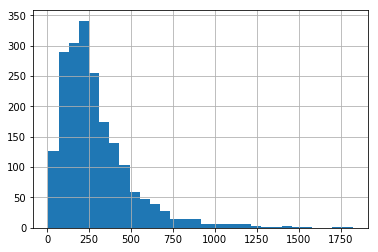

In [24]:
df['duration'].hist(bins=30)

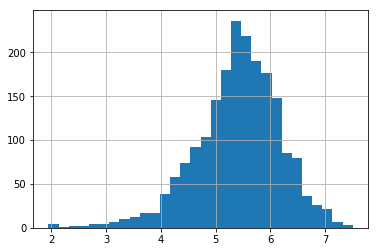

In [25]:
df['duration_log'] = np.log(df['duration'])
df['duration_log'].hist(bins=30)

Much nicer distribution

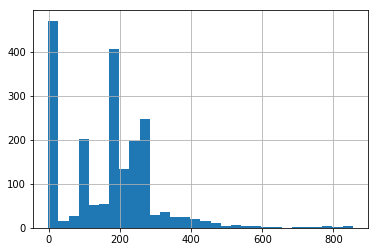

In [26]:
df['pdays'].hist(bins=30)

not too bad, spike at the early stage for first call

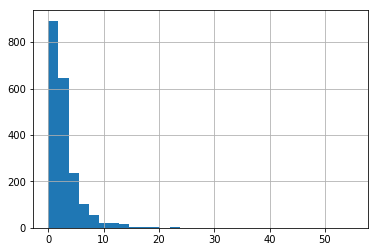

In [27]:
df['previous'].hist(bins=30)

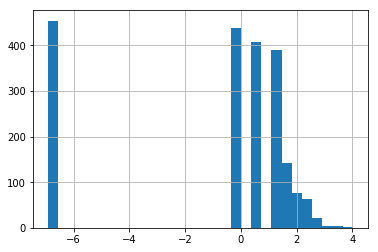

In [28]:
df['previous_adj'] = np.where(df.previous==0, 0.001, df.previous)
df['previous_log'] = np.log(df['previous_adj'])
df['previous_log'].hist(bins=30)

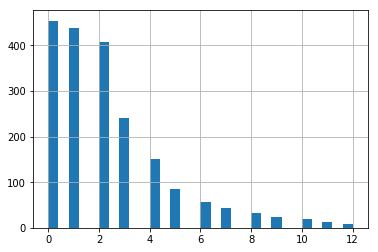

In [29]:
dfPrevOut = df[(np.abs(stats.zscore(df.previous)) < 3)]
dfPrevOut['previous'].hist(bins=30)

Nope! Messy

1. Balance: Since there are negative values here, can't do log transformation. Maybe with absolute values, but I decided that going off z-scores was a simpler method. I disqualified rows with a balance more than 3 standard deviations outside the mean. I'm not sure if it's a good idea to delete rows, though.
2. Duration: This was quite skewed with many outliers, so I went for the log method and it worked quite well, bringing the graph back to a roughly normal distribution.
3. Pdays: Again difficult, since there is a spike at -1 for first-time calls. I could probably apply the z-score method here again, to disqualify the particularly long-time values.
4. Previous: Heavily skewed, so I applied the log transformation, but it didn't work so well with such small values. Even using z-scores was a struggle, so I decided it was best to leave this be.

## New Feature

In [30]:
df.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,subscribed,duration_log,previous_adj,previous_log
0,0,32.0,technician,single,tertiary,no,392,yes,no,cellular,...,apr,957,2,131,2,failure,no,6.863803,2.0,0.693147
1,1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,...,apr,233,2,133,1,failure,no,5.451038,1.0,0.000000
2,2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,...,apr,126,2,239,1,failure,no,4.836282,1.0,0.000000
3,3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,...,apr,274,1,238,2,failure,no,5.613128,2.0,0.693147
4,4,54.0,retired,married,secondary,no,1004,yes,no,cellular,...,apr,479,1,307,1,failure,no,6.171701,1.0,0.000000


A useful feature for predicting a subscription may be 

`duration / previous`

In this way, we could track the average days between calls, to find the appropriate frequency for contacting customers, especially those who eventually subscribe. We could also compare that with the 'previous' for those who subscribe, to see if they're more likely to subscribe after being contacted sooner or later than average. 

In [35]:
# Disqualify first time calls
dfPrevAdj = df[(df.previous>0)]

dfPrevAdj['avg_wait'] = dfPrevAdj['duration'] / dfPrevAdj['previous']
dfPrevAdj.sort_values(by='avg_wait', ascending=False).head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,subscribed,duration_log,previous_adj,previous_log,avg_wait
411,411,58.0,technician,married,secondary,no,0,yes,no,cellular,...,1823,1,205,1,failure,no,7.508239,1.0,0.0,1823.0
1868,1868,48.0,management,single,tertiary,no,1819,no,no,cellular,...,1440,1,458,1,failure,yes,7.272398,1.0,0.0,1440.0
1450,1450,25.0,student,single,secondary,no,1957,no,no,cellular,...,1207,4,385,1,failure,yes,7.095893,1.0,0.0,1207.0
1319,1319,60.0,unemployed,married,primary,no,0,no,no,cellular,...,1193,1,412,1,other,yes,7.084226,1.0,0.0,1193.0
1355,1355,46.0,admin.,married,secondary,no,5021,no,no,cellular,...,957,1,182,1,success,yes,6.863803,1.0,0.0,957.0


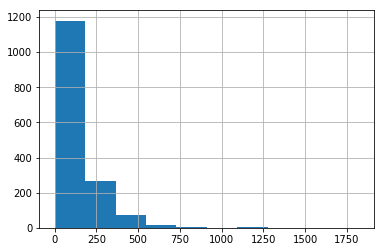

In [38]:
dfPrevAdj['avg_wait'].hist(bins=10)

In [43]:
bins = [0, 7, 14, 30, 60, 90, 180, 360, 720, 1080]
dfPrevAdj.groupby([dfPrevAdj.subscribed, pd.cut(dfPrevAdj.avg_wait, bins)]).size().unstack()

avg_wait,"(0, 7]","(7, 14]","(14, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 360]","(360, 720]","(720, 1080]"
subscribed,,,,,,,,,
no,25.0,35.0,94.0,166.0,150.0,205.0,111.0,43.0,4.0
yes,NaN,6.0,55.0,116.0,108.0,210.0,162.0,49.0,3.0


Results seem promising, with a clear trend towards higher subscription chances if customers are given a longer average wait between calls. This could be worth investigating further.